In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

### Анализ коэффициентов букмекеров

Источник данных: https://www.kaggle.com/caesarlupum/betsstrategy


Гипотеза: букмекерские компании обладают большим штатом профессиональных аналитиков, поэтому с большой (не менее 75%) долей вероятности должны предсказывать результат спортивных событий путем определения минимального коэффициента (т.е. максимальной вероятности) для любого события. 

Для чистоты эксперимента возьмем стерильные условия - мы ничего не знаем про силу команд, особенности соревнований, а также предыдущие результаты. Игрок выбирает один из трех исходов и руководствуется исключительно коэффициентами букмекера. 

In [3]:
df = pd.read_csv('/Users/vladi/Desktop/Stat/Course_project/FootballDataEurope.csv', index_col = "id")
df.dataframeName = 'FootballDataEurope.csv'
df.head(100)

,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal,B365H,B365D,B365A,BSH,BSD,BSA,diff_goals,target
id,,,,,,,,,,,,,,,,,
24559,Switzerland,Switzerland Super League,2008/2009,1,2008-07-18 00:00:00,BSC Young Boys,FC Basel,1,2,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
24560,Switzerland,Switzerland Super League,2008/2009,1,2008-07-19 00:00:00,FC Aarau,FC Sion,3,1,NaN,NaN,NaN,NaN,NaN,NaN,2,1
24561,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,FC Luzern,FC Vaduz,1,2,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
24562,Switzerland,Switzerland Super League,2008/2009,1,2008-07-20 00:00:00,Neuchâtel Xamax,FC Zürich,1,2,NaN,NaN,NaN,NaN,NaN,NaN,-1,1
24613,Switzerland,Switzerland Super League,2008/2009,2,2008-07-23 00:00:00,FC Basel,Grasshopper Club Zürich,1,0,NaN,NaN,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,France,France Ligue 1,2008/2009,2,2008-08-17 00:00:00,Olympique de Marseille,AJ Auxerre,4,0,1.57,3.6,6.5,1.57,3.30,6.00,4,1
7813,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-17 00:00:00,Eintracht Frankfurt,Hertha BSC Berlin,0,2,2.35,3.3,3.0,2.25,3.25,2.88,-2,1
7816,Germany,Germany 1. Bundesliga,2008/2009,1,2008-08-17 00:00:00,Borussia Mönchengladbach,VfB Stuttgart,1,3,2.75,3.3,2.5,2.62,3.10,2.50,-2,1


Содержание таблицы:

 - id - порядковый номер записи
 - country_name - страна, где проходило соревнование
 - league_name - наименование лиги
 - season - сезон соревнований
 - stage - тур
 - date - дата
 - home_team - команда, игравшая домашний матч
 - away_team - гостевая команда
 - home_team_goal - количество голов домашней команды
 - away_team_goal - количество голов гостевой команды
 - B365H - коэффициент на победу домашней команды по мнению букмекерской конторы Bet 365
 - B365D - коэффициент на ничью по мнению букмекерской конторы Bet 365
 - B365A - коэффициент на победу гостевой команды по мнению букмекерской конторы Bet 365
 - BSH - коэффициент на победу домашней команды по мнению букмекерской конторы Blue Square
 - BSD - коэффициент на ничью по мнению букмекерской конторы Blue Square
 - BSA - коэффициент на победу гостевой команды по мнению букмекерской конторы Blue Square
 - diff_goals - разница мячей в матче
 - target - доп. показатель, без описания
 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25979 entries, 24559 to 25949
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    25979 non-null  object 
 1   league_name     25979 non-null  object 
 2   season          25979 non-null  object 
 3   stage           25979 non-null  int64  
 4   date            25979 non-null  object 
 5   home_team       25979 non-null  object 
 6   away_team       25979 non-null  object 
 7   home_team_goal  25979 non-null  int64  
 8   away_team_goal  25979 non-null  int64  
 9   B365H           22592 non-null  float64
 10  B365D           22592 non-null  float64
 11  B365A           22592 non-null  float64
 12  BSH             14161 non-null  float64
 13  BSD             14161 non-null  float64
 14  BSA             14161 non-null  float64
 15  diff_goals      25979 non-null  int64  
 16  target          25979 non-null  int64  
dtypes: float64(6), int64(5), ob

In [5]:
#рассмотрим корелляцию между данными
df.corr()

,stage,home_team_goal,away_team_goal,B365H,B365D,B365A,BSH,BSD,BSA,diff_goals,target
stage,1.000000,0.015150,0.004961,0.007191,0.030876,0.009771,0.009461,0.034471,0.012731,0.007847,0.018010
home_team_goal,0.015150,1.000000,-0.064099,-0.257088,0.268319,0.355400,-0.254323,0.268662,0.346575,0.768831,0.248053
away_team_goal,0.004961,-0.064099,1.000000,0.296866,-0.073547,-0.228681,0.296190,-0.073455,-0.221915,-0.687419,0.085765
B365H,0.007191,-0.257088,0.296866,1.000000,0.017867,-0.473405,0.989130,-0.033459,-0.508127,-0.377101,0.009583
B365D,0.030876,0.268319,-0.073547,0.017867,1.000000,0.822159,-0.033263,0.978081,0.826935,0.242162,0.117118
B365A,0.009771,0.355400,-0.228681,-0.473405,0.822159,1.000000,-0.514268,0.825605,0.982051,0.404868,0.096220
BSH,0.009461,-0.254323,0.296190,0.989130,-0.033263,-0.514268,1.000000,-0.043640,-0.519117,-0.377293,0.003117
BSD,0.034471,0.268662,-0.073455,-0.033459,0.978081,0.825605,-0.043640,1.000000,0.828611,0.244345,0.114880
BSA,0.012731,0.346575,-0.221915,-0.508127,0.826935,0.982051,-0.519117,0.828611,1.000000,0.397108,0.094150
diff_goals,0.007847,0.768831,-0.687419,-0.377101,0.242162,0.404868,-0.377293,0.244345,0.397108,1.000000,0.125567


Как мы видим, коэффициенты двух букмекерских контор имеют большую корреляцию, значит они почти совпадают. Т.к. данные по коэффициентам конторы BS чаще отсутствуют (пропуски почти в половине случаев), то их не будем исследовать. Из-за большой корреляции вывод можно будет распространить и на них. 

Также избавимся от незначимых для исследования колонок - country_name, league_name, season, stage, date, home_team, away_team, target. Согласно гипотезе, букмекерская контора должна предсказывать любые события, поэтому все привязки к конкретным соревнованиям можно убрать. 

сохраним данные в новую базу данных. Сразу избавимся от записей, не содержащих данные по коэффициентам. 

In [6]:
B365 = df.drop(['BSH', 'BSD', 'BSA', 'country_name', 'league_name', 'season', 'stage', 'date', 'home_team', 'away_team', 'target'], axis=1)
B365 = B365[pd.notnull(B365['B365H'])]

In [7]:
B365

,home_team_goal,away_team_goal,B365H,B365D,B365A,diff_goals
id,,,,,,
4769,2,1,2.10,3.10,3.75,1
4770,2,1,1.57,3.60,6.50,1
4771,1,0,2.30,3.00,3.40,1
4772,0,1,2.10,3.10,3.80,-1
4774,1,0,2.40,3.10,3.10,1
...,...,...,...,...,...,...
24491,2,1,5.00,3.80,1.70,1
24492,4,2,2.00,3.60,3.70,2
24495,4,1,1.80,3.75,4.50,3


In [8]:
B365.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22592 entries, 4769 to 4702
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   home_team_goal  22592 non-null  int64  
 1   away_team_goal  22592 non-null  int64  
 2   B365H           22592 non-null  float64
 3   B365D           22592 non-null  float64
 4   B365A           22592 non-null  float64
 5   diff_goals      22592 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.2 MB


Проверим, есть ли ошибки в графе 'diff_goals' путем вычисления разницы голов.  

In [9]:
B365.loc[B365['home_team_goal'] - B365['away_team_goal'] != B365['diff_goals']]

,home_team_goal,away_team_goal,B365H,B365D,B365A,diff_goals
id,,,,,,


In [10]:
# Ошибок нет, поэтому данные столбцы данных также удаляем, т.к. они относятся к финальному результату, а не прогнозу. 

B365 = B365.drop(['home_team_goal', 'away_team_goal'], axis=1)

In [11]:
#Переведем коэффициенты в проценты вероятности. Для этого нужно разделить 1 на коэффициент. 
#Но при этом сумма вероятностей получится более 100% из-за заложенной маржи букмекера, в среднем около 5%. 
#Разделим 0.95 на коэффициенты. 


B365['B365H'] = 0.95/B365['B365H']
B365['B365D'] = 0.95/B365['B365D']
B365['B365A'] = 0.95/B365['B365A']

In [12]:
#В данном исследовании нас интересует только исход матча, поэтому присвоим категорию 1 матчам, где победила домашнаяя команда (аналог B365H),
#а 2 - гостевая (аналог B365A). Ничейные исходы остаются с категорией 0 (аналог B365D). Колонку переименуем в результат
B365.loc[B365['diff_goals'] > 0, 'diff_goals'] = 1
B365.loc[B365['diff_goals'] < 0, 'diff_goals'] = 2


In [13]:
B365.rename(columns={"diff_goals": "result"}, inplace=True)

В рамках выдвинутой гипотезы примем результат с наибольшей, по мнению букмекера вероятностью, за предсказанный исход. Добавим доп. колонку 'B365_result', в которую по тому же принципу внесем коэффициенты 0, 1, 2 в зависимости от исхода. В доп. колонку 'B365_result_prob' внесем вероятность реально произошедшего события по предсказанию букмекера. 

In [14]:
B365['B365_result'] = 99
B365.loc[(B365['B365H'] > B365['B365D']) & (B365['B365H'] > B365['B365A']), 'B365_result'] = 1
B365.loc[(B365['B365D'] > B365['B365H']) & (B365['B365D'] > B365['B365A']), 'B365_result'] = 0
B365.loc[(B365['B365A'] > B365['B365D']) & (B365['B365A'] > B365['B365H']), 'B365_result'] = 2

In [15]:
B365.describe()

,B365H,B365D,B365A,result,B365_result
count,22592.000000,22592.000000,22592.000000,22592.000000,22592.000000
mean,0.454360,0.260020,0.294074,1.034924,2.034525
std,0.175866,0.047101,0.156993,0.734675,8.603805
min,0.036538,0.055882,0.018627,0.000000,0.000000
25%,0.339286,0.237500,0.180952,0.000000,1.000000
50%,0.452381,0.271429,0.271429,1.000000,1.000000
75%,0.568862,0.287879,0.380000,2.000000,2.000000
max,0.913462,0.678571,0.879630,2.000000,99.000000


In [16]:
#мы видим значение предсказанного результата 99 - виртуальное значение, занесенное для проверки правильности данных. 
#Это означает, что в ряде строк два события имеют равное максимальное значение вероятности. Найдем их

B365.loc[B365['B365_result'] == 99]

,B365H,B365D,B365A,result,B365_result
id,,,,,
203,0.380000,0.287879,0.380000,2,99
10261,0.345455,0.316667,0.345455,0,99
21523,0.362595,0.287879,0.362595,2,99
286,0.362595,0.292308,0.362595,0,99
21869,0.362595,0.292308,0.362595,1,99
...,...,...,...,...,...
21435,0.361217,0.287879,0.361217,2,99
15624,0.365385,0.279412,0.365385,2,99
13157,0.345455,0.306452,0.345455,1,99


In [17]:
#Это получилось 176 значений, где может быть как правильное решение, так и ошибочное. Это 0,7% всех данных. 
#Этими данными решено пренебречь
B365 = B365[B365['B365_result'] != 99]

In [18]:
B365['B365_result_prob'] = 99
B365.loc[(B365['result'] == 0), 'B365_result_prob'] = B365['B365D']
B365.loc[(B365['result'] == 1), 'B365_result_prob'] = B365['B365H']
B365.loc[(B365['result'] == 2), 'B365_result_prob'] = B365['B365A']


In [19]:
B365['B365_result_max'] = 99
B365.loc[(B365['B365H'] > B365['B365D']) & (B365['B365H'] > B365['B365A']), 'B365_result_max'] = B365['B365H']
B365.loc[(B365['B365D'] > B365['B365H']) & (B365['B365D'] > B365['B365A']), 'B365_result_max'] = B365['B365D']
B365.loc[(B365['B365A'] > B365['B365D']) & (B365['B365A'] > B365['B365H']), 'B365_result_max'] = B365['B365A']

In [20]:
B365.head(10)

,B365H,B365D,B365A,result,B365_result,B365_result_prob,B365_result_max
id,,,,,,,
4769,0.452381,0.306452,0.253333,1,1,0.452381,0.452381
4770,0.605096,0.263889,0.146154,1,1,0.605096,0.605096
4771,0.413043,0.316667,0.279412,1,1,0.413043,0.413043
4772,0.452381,0.306452,0.250000,2,1,0.250000,0.452381
4774,0.395833,0.306452,0.306452,1,1,0.395833,0.395833
4775,0.441860,0.306452,0.263889,0,1,0.306452,0.441860
4776,0.351852,0.316667,0.339286,0,1,0.316667,0.351852
4777,0.497382,0.296875,0.219400,2,1,0.219400,0.497382
4778,0.395833,0.306452,0.306452,1,1,0.395833,0.395833


In [21]:
# Имея реальный исход и прогнозную вероятность его, исследуем 'B365_result_prob'.
mean = B365['B365_result_prob'].mean()
var = B365['B365_result_prob'].var()
std = B365['B365_result_prob'].std(ddof=1)
quantile = B365['B365_result_prob'].quantile([0.25, 0.5, 0.75])

print(f'Среднее арифметическое: {mean}')
print(f'Дисперсия: {var}')
print(f'Среднеквадратическое отклонение: {std}')
print(f'Квантили:\n{quantile}')


Среднее арифметическое: 0.4205972030239609
Дисперсия: 0.03273526520151908
Среднеквадратическое отклонение: 0.1809288954299978
Квантили:
0.25    0.279412
0.50    0.380000
0.75    0.549133
Name: B365_result_prob, dtype: float64


Построим графики распределения реальных и предсказанных исходов. 


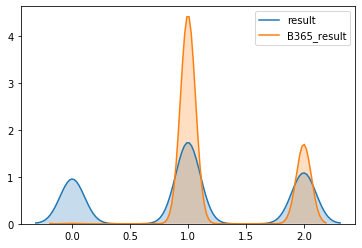

In [22]:
snsplot = sns.kdeplot(B365['result'], shade=True)
snsplot = sns.kdeplot(B365['B365_result'], shade=True)
fig = snsplot.get_figure()

По данному графику мы видим серьезное расхождение между показателями. Предсказанных ничейных результатов (0) оказалось намного меньше, чем было в реальности. Сопоставимое количество для побед гостей (2). Но огромная разница в результатах домашней команды (1). 

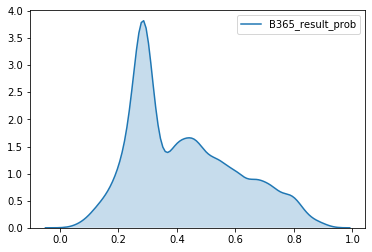

In [23]:
snsplot = sns.kdeplot(B365['B365_result_prob'], shade=True)
fig = snsplot.get_figure()

Большая часть правильных исходов давалась с вероятностью около 0.3 

In [24]:
from scipy import stats

In [28]:
# Рассмотрим корреляцию между имеющимися значениями. Реальный результат коррелирует с предсказанным на 18%, что очень низкий показатель. 

B365[['B365H', 'B365D', 'B365A', 'result', 'B365_result', 'B365_result_prob', 'B365_result_max']].corr()

,B365H,B365D,B365A,result,B365_result,B365_result_prob,B365_result_max
B365H,1.000000,-0.502443,-0.965357,-0.179906,-0.736960,0.313513,0.532205
B365D,-0.502443,1.000000,0.269235,-0.015851,0.066664,-0.530295,-0.910760
B365A,-0.965357,0.269235,1.000000,0.206124,0.803167,-0.189218,-0.318455
result,-0.179906,-0.015851,0.206124,1.000000,0.180579,0.206630,0.002435
B365_result,-0.736960,0.066664,0.803167,0.180579,1.000000,-0.071607,-0.126239
B365_result_prob,0.313513,-0.530295,-0.189218,0.206630,-0.071607,1.000000,0.543982
B365_result_max,0.532205,-0.910760,-0.318455,0.002435,-0.126239,0.543982,1.000000


In [29]:
np.corrcoef(B365['result'], B365['B365_result'])

array([[1.        , 0.18057918],
       [0.18057918, 1.        ]])

In [30]:
np.cov(B365['result'], B365['B365_result'], ddof=1)

array([[0.53898785, 0.05947318],
       [0.05947318, 0.20124636]])

In [31]:
def norm_test1(keys):
    fig, axes = plt.subplots(ncols=len(keys))
    fig.set_size_inches(4 * len(keys), 4)
    axes = axes.flatten()

    for key, ax in zip(keys, axes):
        ax.hist(B365[key], density=True)

        loc = B365[key].mean()
        scale = B365[key].std()

        x_left, x_right = ax.get_xlim()
        x = np.linspace(x_left, x_right, 10000)
        y = stats.norm.pdf(x, loc=loc, scale=scale)

        ax.plot(x, y, linestyle='dashed')
        ax.set_title(key)
        
def norm_test2(keys):
    fig, axes = plt.subplots(ncols=len(keys))
    fig.set_size_inches(4 * len(keys), 4)
    axes = axes.flatten()

    for key, ax in zip(keys, axes):
        samples = B365[key]

        loc = samples.mean()
        scale = samples.std()

        interval = np.linspace(0, 1, samples.shape[0])[1:-1]
        x = stats.norm.ppf(interval, loc=loc, scale=scale)
        y = np.quantile(samples, interval)

        ax.scatter(x, y, s=5)
        ax.plot(x, x, color='C1', linestyle='dashed')

        ax.set_title(key)
        ax.set_xlabel('theoretical quantiles')
        ax.set_ylabel('sample quantiles')
        
def norm_test3(keys):
    for key in keys:
        print(key)

        samples = B365[key]

        loc = samples.mean()
        scale = samples.std()

        for i in range(1, 4):
            true_value = stats.norm.cdf(i) - stats.norm.cdf(-i)
            sample_value = ((samples >= loc - i * scale) & (samples <= loc + i * scale)).sum() / samples.shape[0]

            print(f'{i} sigma(s)')
            print(f'\ttheoretical:\t{true_value}')
            print(f'\tsample:\t\t{sample_value}')

        print()

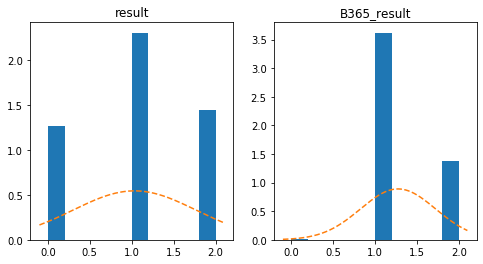

In [32]:
keys = ['result', 'B365_result']

norm_test1(keys)

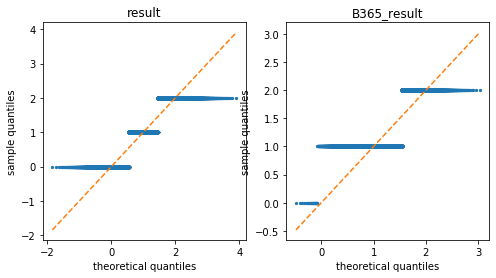

In [33]:
norm_test2(keys)

In [34]:
norm_test3(keys)

result
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.45985010706638113
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		1.0
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0

B365_result
1 sigma(s)
	theoretical:	0.6826894921370859
	sample:		0.7241256245538901
2 sigma(s)
	theoretical:	0.9544997361036416
	sample:		0.9986616702355461
3 sigma(s)
	theoretical:	0.9973002039367398
	sample:		1.0



Из всех полученных выше данных можно сделать заключение, что гипотеза ошибочна. Связи между реальным исходом и исходом, выбранным по наибольшей вероятности практически нет. Соответственно, такая стратегия игры на ставках в корне ошибочна. Для подтверждения данного вывода построим несколько математических моделей для предсказания результата. 

In [35]:
X = B365.drop(['result', 'B365_result_prob', 'B365_result'], axis=1)
Y = B365[['result']]

In [31]:
from pandas import read_csv, DataFrame
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [32]:
models = [LinearRegression(), # метод наименьших квадратов
          RandomForestRegressor(n_estimators=100, max_features ='sqrt'), # случайный лес
          KNeighborsRegressor(n_neighbors=6), # метод ближайших соседей
          SVR(kernel='linear'), # метод опорных векторов с линейным ядром
          LogisticRegression() # логистическая регрессия
          ]

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)


In [34]:
TestModels = DataFrame()
tmp = {}
for model in models:
    m = str(model)
    tmp['Model'] = m[:m.index('(')]    
    for i in range(Y_train.shape[1]):
        model.fit(X_train, Y_train) 
        tmp['R2_Y%s'%str(i+1)] = r2_score(Y_test, model.predict(X_test))
    TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)

C:\Users\vladi\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
C:\Users\vladi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\vladi\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


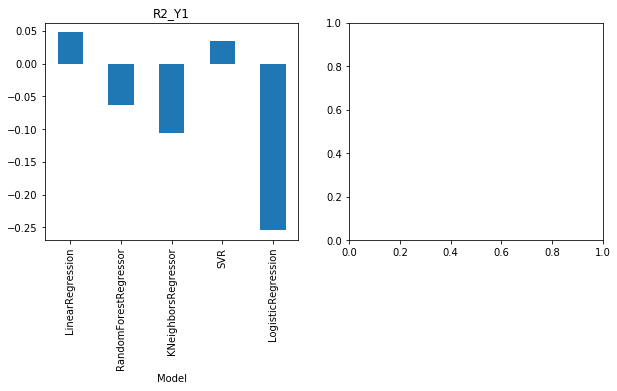

In [35]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4))
TestModels.R2_Y1.plot(ax=axes[0], kind='bar', title='R2_Y1')


Лучший результат получился у линейной регрессии - около 5%. Что подтверждает несостоятельность гипотезы и невозможность предсказания исхода исключительно по коэффициентам без изучения дополнительных данных. 